In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
from imblearn.combine import SMOTETomek
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import sklearn.tree as tree
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Sanjeev\Dataset\winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


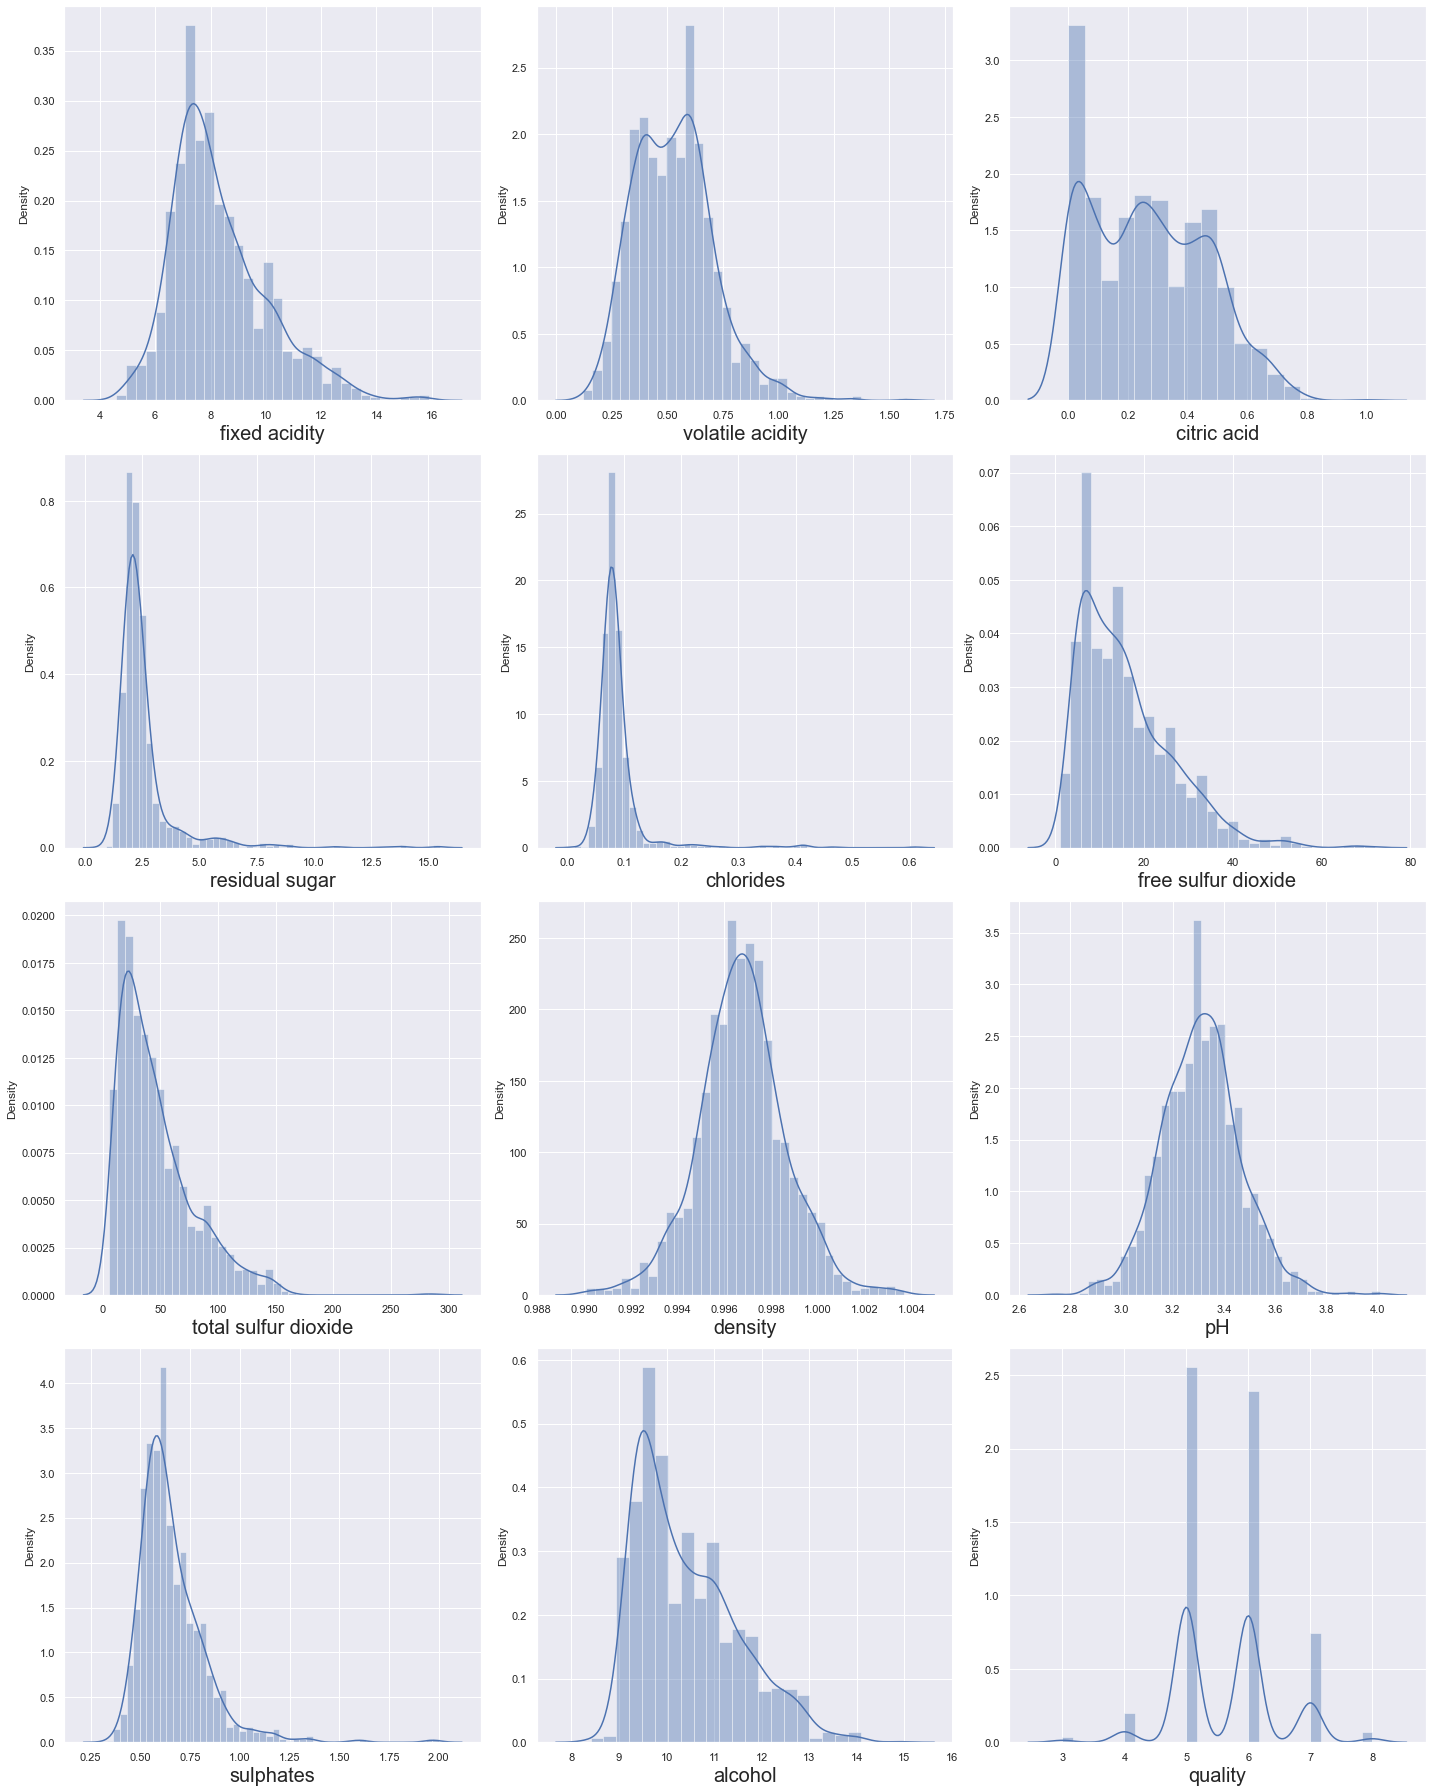

In [5]:
# Let's see how the dataset is distributed for every column
plt.figure(figsize=(20,25))
plotnumber = 1
for col in df:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()
plt.show()        

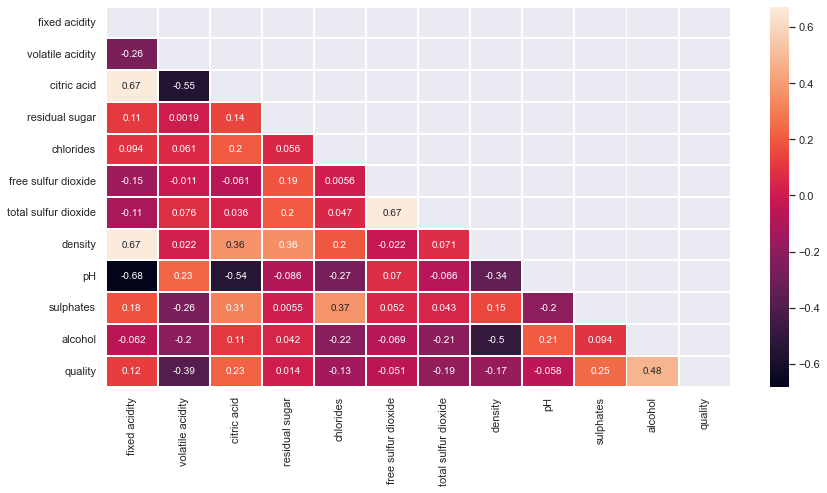

In [6]:
# Heatmap for co-relation
corr   = df.corr()
plt.figure(figsize=(14,7))
mask = np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr, mask=mask,annot=True, fmt= '0.2g', linewidths=1)
plt.show()

In [7]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
import missingno as msno

<AxesSubplot:>

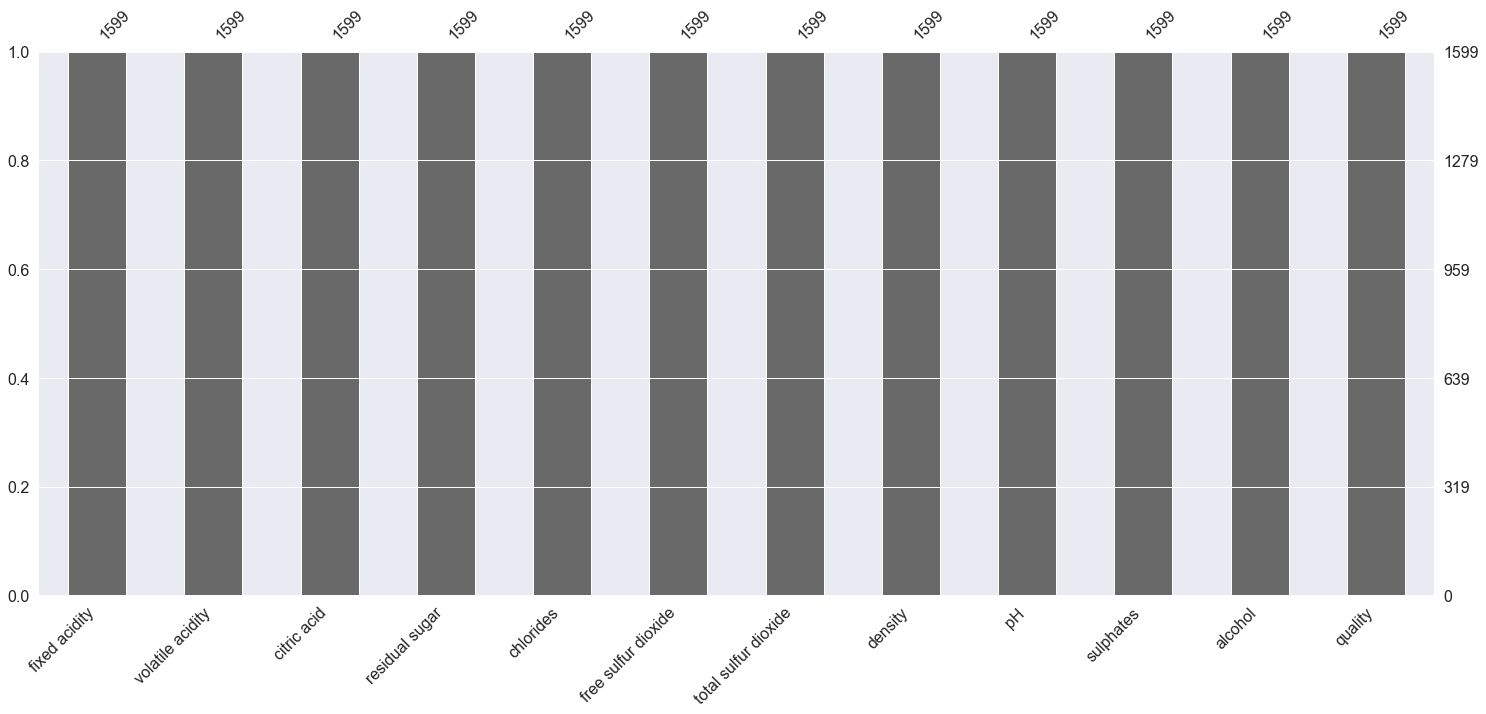

In [9]:
msno.bar(df)

<AxesSubplot:>

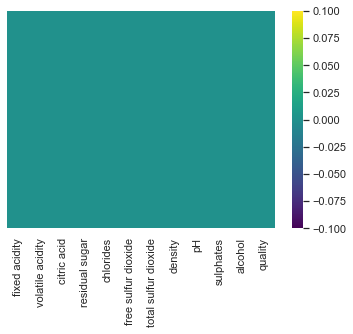

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

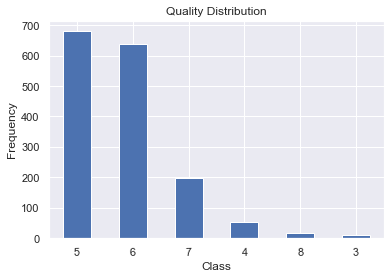

In [11]:
# distribution of imbalanced data
count_class = pd.value_counts(df['quality'],sort=True)
count_class.plot(kind='bar',rot=2)
plt.title('Quality Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [12]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [13]:
x = df.drop(columns=['quality'])
y = df.quality

In [14]:
smk = SMOTETomek(random_state =42)
x_res_up , y_res_up = smk.fit_resample(x,y)

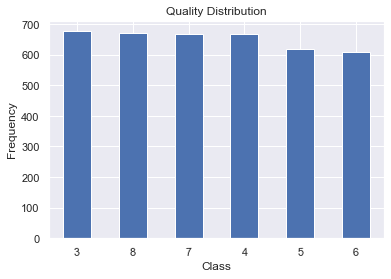

In [15]:
# distribution of imbalanced data
count_class = pd.value_counts(y_res_up,sort=True)
count_class.plot(kind='bar',rot=2)
plt.title('Quality Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [16]:
x_res_up.shape, y_res_up.shape

((3914, 11), (3914,))

In [17]:
sc = StandardScaler()
x = sc.fit_transform(x_res_up)


In [ ]:
x = pd.DataFrame(x, columns=x_res_up.columns)
x


In [ ]:
x.var()

In [ ]:
x_train ,x_test ,y_train ,y_test = train_test_split(x, y_res_up, test_size=0.25, random_state=1234)

In [ ]:
x_train.shape, x_test.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(x_train ,y_train)

In [ ]:
# Accuracy Score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
lr_acc = accuracy_score(y_test, lr.predict(x_test))
print(f"Accuracy Score of Training data is: {accuracy_score(y_train, lr.predict(x_train))}")
print(f'Accuracy score of Test data is: {accuracy_score(y_test, lr.predict(x_test))}')

In [24]:
lr_1 = LogisticRegression()
lr_1.fit(x_train,y_train)

LogisticRegression()

In [25]:
accuracy_score(y_test, lr_1.predict(x_test))

0.6067415730337079

### KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [27]:
knn.fit(x_train ,y_train)

KNeighborsClassifier()

In [28]:
 print(f"Accuracy Score of Training data is: {accuracy_score(y_train, knn.predict(x_train))}")
print(f'Accuracy score of Test data is: {accuracy_score(y_test, knn.predict(x_test))}')

Accuracy Score of Training data is: 0.8603066439522998
Accuracy score of Test data is: 0.7773237997957099


### SVC

In [29]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train ,y_train)

SVC()

In [30]:
print(f"Accuracy Score of Training data is: {accuracy_score(y_train, svc.predict(x_train))}")
print(f'Accuracy score of Test data is: {accuracy_score(y_test, svc.predict(x_test))}')

Accuracy Score of Training data is: 0.802725724020443
Accuracy score of Test data is: 0.780388151174668


### SGD Classifier


In [31]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
parameters = {
    'alpha':[0.0001, 0.001,0.01, 0.1,1],
    'loss':['hinge','log'],
    'penalty':['l1','l2']
    

}
grid_search = GridSearchCV(estimator=sgd, param_grid=parameters,cv=10)

In [32]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ['hinge', 'log'], 'penalty': ['l1', 'l2']})

In [33]:
grid_search.best_params_

{'alpha': 0.001, 'loss': 'log', 'penalty': 'l1'}

In [34]:
sgd_best = SGDClassifier(alpha=0.001, loss = 'log',penalty='l1')
sgd_best.fit(x_train, y_train)

SGDClassifier(alpha=0.001, loss='log', penalty='l1')

In [35]:
sgd_best.fit(x_train,y_train)

print(accuracy_score(y_train, sgd_best.predict(x_train)))
print(accuracy_score(y_test, sgd_best.predict(x_test)))

0.6115843270868825
0.5985699693564862


### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train ,y_train)
print(f"Accuracy Score of Training data is: {accuracy_score(y_train, dtc.predict(x_train))}")
print(f'Accuracy score of Test data is: {accuracy_score(y_test, dtc.predict(x_test))}')

Accuracy Score of Training data is: 1.0
Accuracy score of Test data is: 0.7844739530132788


In [37]:
parameters = {
    'criterion':['gini', 'entropy'],
    'splitter':['best','random'],
    
}

[Text(409.96122955186763, 371.8718181818182, 'X[9] <= -0.099\ngini = 0.833\nsamples = 2935\nvalue = [504, 499, 447, 461, 520, 504]'),
 Text(255.36757146519, 354.57545454545453, 'X[1] <= 0.579\ngini = 0.767\nsamples = 1566\nvalue = [454, 442, 323, 230, 114, 3]'),
 Text(192.1107691378843, 337.2790909090909, 'X[4] <= 0.682\ngini = 0.771\nsamples = 912\nvalue = [91, 233, 276, 199, 110, 3]'),
 Text(150.17663436769143, 319.98272727272723, 'X[10] <= 0.228\ngini = 0.746\nsamples = 837\nvalue = [28, 233, 272, 191, 110, 3]'),
 Text(109.36267116903366, 302.6863636363636, 'X[6] <= 0.469\ngini = 0.694\nsamples = 626\nvalue = [28, 198, 250, 130, 20, 0]'),
 Text(84.00190404365658, 285.39, 'X[7] <= 1.766\ngini = 0.703\nsamples = 442\nvalue = [28, 181, 132, 82, 19, 0]'),
 Text(55.760754838491, 268.09363636363634, 'X[9] <= -0.487\ngini = 0.664\nsamples = 403\nvalue = [1, 181, 123, 79, 19, 0]'),
 Text(27.53780971426635, 250.7972727272727, 'X[8] <= -0.693\ngini = 0.584\nsamples = 272\nvalue = [1, 152, 82,

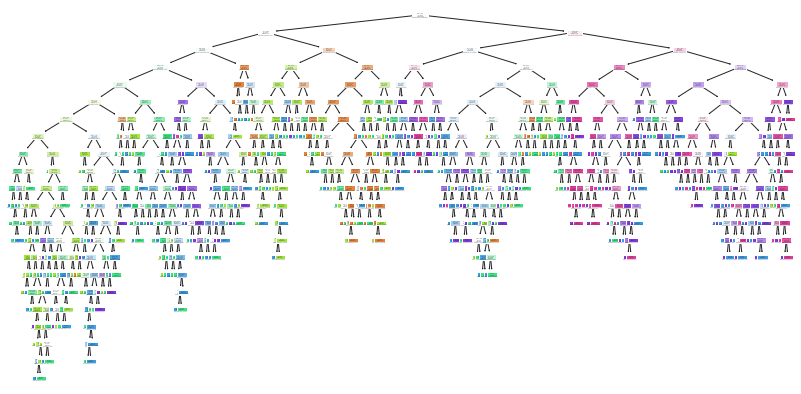

In [38]:
plt.figure(figsize=(14,7))
tree.plot_tree(dtc, filled=True)

In [39]:
path = dtc.cost_complexity_pruning_path(x, y_res_up)
path

{'ccp_alphas': array([0.        , 0.00020439, 0.00021899, 0.00022356, 0.00022356,
        0.00022994, 0.00023584, 0.00023724, 0.00023846, 0.00023952,
        0.00024046, 0.00024046, 0.00024046, 0.0002413 , 0.00024272,
        0.00024307, 0.00024333, 0.00024438, 0.00024567, 0.00024603,
        0.00024616, 0.00024725, 0.00024725, 0.00024775, 0.0002515 ,
        0.0002523 , 0.00025294, 0.00025363, 0.00025394, 0.00025549,
        0.00025549, 0.00025549, 0.00025549, 0.00025549, 0.00025549,
        0.00025549, 0.00025549, 0.00025549, 0.00025549, 0.00025549,
        0.00025549, 0.00025549, 0.00025549, 0.00025549, 0.00025549,
        0.00025549, 0.00025549, 0.00025549, 0.00025549, 0.00025549,
        0.00028162, 0.00029808, 0.00031716, 0.00034066, 0.00034066,
        0.00034066, 0.00034066, 0.00034066, 0.00034066, 0.00034066,
        0.00034066, 0.00034066, 0.00034066, 0.00034066, 0.00034066,
        0.00034066, 0.00034066, 0.00034066, 0.00034066, 0.00034066,
        0.00036456, 0.00038324, 0.

In [40]:
ccp_alphas = path['ccp_alphas']

In [41]:
dtc2 = []
for ccp in ccp_alphas:
    dt_model = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_model.fit(x, y_res_up)
    dtc2.append(dt_model)
    

In [42]:
train_score=  [i.score(x_train ,y_train) for i in dtc2]
test_score = [i.score(x_test,y_test) for i in dtc2]

In [43]:
train_score

[1.0,
 1.0,
 0.9996592844974447,
 0.9989778534923339,
 0.9989778534923339,
 0.9986371379897785,
 0.9982964224872232,
 0.9979557069846678,
 0.9976149914821124,
 0.9976149914821124,
 0.9976149914821124,
 0.9972742759795571,
 0.9976149914821124,
 0.9972742759795571,
 0.9969335604770017,
 0.9959114139693356,
 0.9952299829642248,
 0.9948892674616695,
 0.9945485519591142,
 0.9942078364565587,
 0.9938671209540034,
 0.993526405451448,
 0.9931856899488927,
 0.9928449744463373,
 0.9928449744463373,
 0.9925042589437819,
 0.9918228279386712,
 0.9914821124361158,
 0.9908006814310051,
 0.9850085178875639,
 0.9846678023850085,
 0.9843270868824532,
 0.9846678023850085,
 0.9850085178875639,
 0.9850085178875639,
 0.9850085178875639,
 0.9846678023850085,
 0.9850085178875639,
 0.9846678023850085,
 0.9843270868824532,
 0.9846678023850085,
 0.9843270868824532,
 0.9846678023850085,
 0.9850085178875639,
 0.9846678023850085,
 0.9843270868824532,
 0.9850085178875639,
 0.9846678023850085,
 0.9846678023850085,
 0

In [44]:
test_score

[1.0,
 0.9989785495403473,
 0.9989785495403473,
 0.9989785495403473,
 0.9989785495403473,
 0.9989785495403473,
 0.9989785495403473,
 0.9989785495403473,
 0.9989785495403473,
 0.9979570990806946,
 0.9969356486210419,
 0.9959141981613892,
 0.9969356486210419,
 0.9948927477017364,
 0.9948927477017364,
 0.9948927477017364,
 0.9959141981613892,
 0.9959141981613892,
 0.9948927477017364,
 0.9948927477017364,
 0.9959141981613892,
 0.9959141981613892,
 0.992849846782431,
 0.9918283963227783,
 0.9918283963227783,
 0.9918283963227783,
 0.9918283963227783,
 0.9918283963227783,
 0.9918283963227783,
 0.9877425944841676,
 0.9877425944841676,
 0.9877425944841676,
 0.9877425944841676,
 0.9877425944841676,
 0.9877425944841676,
 0.9877425944841676,
 0.9877425944841676,
 0.9877425944841676,
 0.9877425944841676,
 0.9877425944841676,
 0.9877425944841676,
 0.9877425944841676,
 0.9877425944841676,
 0.9877425944841676,
 0.9877425944841676,
 0.9877425944841676,
 0.9877425944841676,
 0.9877425944841676,
 0.98774

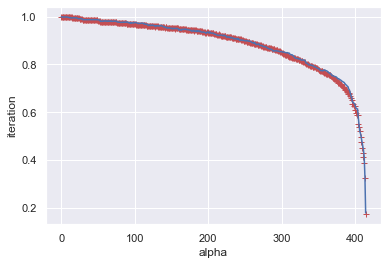

In [45]:
plt.plot(train_score, 'r+', label='train')
plt.plot(test_score, 'b-', label='Validation')
plt.xlabel('alpha')
plt.ylabel('iteration')
plt.show()

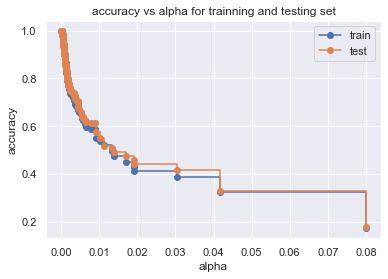

In [46]:
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('accuracy vs alpha for trainning and testing set')
ax.plot(ccp_alphas, train_score, marker='o', label= 'train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_score, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In [47]:
org_model = DecisionTreeClassifier(ccp_alpha=0.01)
org_model.fit(x_train ,y_train)

DecisionTreeClassifier(ccp_alpha=0.01)

In [48]:
org_model.score(x_test, y_test)

0.5352400408580184

In [49]:
org_model.score(x_train ,y_train)

0.5594548551959114

In [50]:
parameters = {
    'criterion':['gini', 'entropy'],
    'splitter':['best','random'],
    'max_depth':range(1,20,2),
    'min_samples_leaf':range(1,20,1)
    
}

In [51]:
grid_dt = GridSearchCV(estimator=dtc, param_grid=parameters, cv=10)

In [52]:
grid_dt.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20, 2),
                         'min_samples_leaf': range(1, 20),
                         'splitter': ['best', 'random']})

In [53]:
grid_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 19,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [54]:
new_dt = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=1, splitter='best')
new_dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [55]:
new_dt.score(x_train, y_train)


0.9986371379897785

In [56]:
new_dt.score(x_test, y_test)

0.8110316649642493

### Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier()
rnd.fit(x_train ,y_train)
print('Trainning accuracy: ',accuracy_score(y_train, rnd.predict(x_train)))
print('Testing accuracy: ', accuracy_score(y_test, rnd.predict(x_test)))

Trainning accuracy:  1.0
Testing accuracy:  0.8712972420837589


### 

### AdaBoostClassifier


In [59]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=dtc)
ada.fit(x_train,y_train)
print('Trainning accuracy: ',accuracy_score(y_train, ada.predict(x_train)))
print('Testing accuracy: ', accuracy_score(y_test, ada.predict(x_test)))

Trainning accuracy:  1.0
Testing accuracy:  0.7885597548518897


In [60]:
grid_param = {
    'n_estimators' : [40, 50, 70, 80, 100],
    'learning_rate' : [0.01, 0.1, 0.05, 0.5, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

In [62]:
grid_ada = GridSearchCV(estimator=ada, cv=5, n_jobs=-1, verbose=1,param_grid=grid_param)

In [64]:
grid_ada.fit(x_train,y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 0.05, 0.5, 1, 10],
                         'n_estimators': [40, 50, 70, 80, 100]},
             verbose=1)

In [66]:
grid_ada.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 70}

In [70]:
grid_ada_new = AdaBoostClassifier(base_estimator=ada,algorithm='SAMME.R', learning_rate=0.01, n_estimators=70  )

In [71]:
grid_ada_new.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
                   learning_rate=0.01, n_estimators=70)

In [72]:
print('Trainning accuracy: ',accuracy_score(y_train, grid_ada_new.predict(x_train)))
print('Testing accuracy: ', accuracy_score(y_test, grid_ada_new.predict(x_test)))

Trainning accuracy:  1.0
Testing accuracy:  0.7916241062308478


### Gradient Boosting Classifier

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
print('Trainning accuracy: ',accuracy_score(y_train, gb.predict(x_train)))
print('Testing accuracy: ', accuracy_score(y_test, gb.predict(x_test)))

Trainning accuracy:  0.9379897785349234
Testing accuracy:  0.8294177732379979


In [75]:
sgb = GradientBoostingClassifier(subsample = 0.9, max_features = 0.8)
sgb.fit(x_train, y_train)

GradientBoostingClassifier(max_features=0.8, subsample=0.9)

In [76]:
print('Trainning accuracy: ',accuracy_score(y_train, sgb.predict(x_train)))
print('Testing accuracy: ', accuracy_score(y_test, sgb.predict(x_test)))

Trainning accuracy:  0.9373083475298126
Testing accuracy:  0.8243105209397344


In [77]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate = 0.1, loss = 'deviance', n_estimators = 100)
xgb.fit(x_train, y_train)
print('Trainning accuracy: ',accuracy_score(y_train, xgb.predict(x_train)))
print('Testing accuracy: ', accuracy_score(y_test, xgb.predict(x_test)))

[08:42:10] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:573: 
Parameters: { "loss" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:42:10] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Trainning accuracy:  0.9979557069846678
Testing accuracy:  0.8651685393258427


In [78]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)

LGBMClassifier()

In [79]:
print('Trainning accuracy: ',accuracy_score(y_train, lgbm.predict(x_train)))
print('Testing accuracy: ', accuracy_score(y_test, lgbm.predict(x_test)))

Trainning accuracy:  1.0
Testing accuracy:  0.8825331971399387


### Cat boost clf

In [80]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()
cat.fit(x_train, y_train)

Learning rate set to 0.083593
0:	learn: 1.6849843	total: 258ms	remaining: 4m 17s
1:	learn: 1.6013436	total: 269ms	remaining: 2m 14s
2:	learn: 1.5245793	total: 281ms	remaining: 1m 33s
3:	learn: 1.4571537	total: 294ms	remaining: 1m 13s
4:	learn: 1.4011277	total: 306ms	remaining: 1m
5:	learn: 1.3514190	total: 318ms	remaining: 52.7s
6:	learn: 1.3067237	total: 331ms	remaining: 46.9s
7:	learn: 1.2669153	total: 343ms	remaining: 42.6s
8:	learn: 1.2336602	total: 355ms	remaining: 39s
9:	learn: 1.2007750	total: 366ms	remaining: 36.2s
10:	learn: 1.1697987	total: 378ms	remaining: 34s
11:	learn: 1.1400681	total: 390ms	remaining: 32.1s
12:	learn: 1.1136120	total: 401ms	remaining: 30.4s
13:	learn: 1.0897060	total: 412ms	remaining: 29s
14:	learn: 1.0668369	total: 424ms	remaining: 27.8s
15:	learn: 1.0485506	total: 436ms	remaining: 26.8s
16:	learn: 1.0289084	total: 446ms	remaining: 25.8s
17:	learn: 1.0103300	total: 460ms	remaining: 25.1s
18:	learn: 0.9939738	total: 472ms	remaining: 24.3s
19:	learn: 0.975

In [81]:
print('Trainning accuracy: ',accuracy_score(y_train, cat.predict(x_train)))
print('Testing accuracy: ', accuracy_score(y_test, cat.predict(x_test)))

Trainning accuracy:  0.9996592844974447
Testing accuracy:  0.8661899897854954


In [82]:
# Extra
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)

ExtraTreesClassifier()

In [83]:
print('Trainning accuracy: ',accuracy_score(y_train, etc.predict(x_train)))
print('Testing accuracy: ', accuracy_score(y_test, etc.predict(x_test)))

Trainning accuracy:  1.0
Testing accuracy:  0.8774259448416751


In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'SVC', 'SGD',  'Decision Tree', 'Random Forest','Ada Boost',
             'Gradient Boosting', 'SGB', 'XgBoost', 'LGBM', 'Cat Boost', 'Extra Tree'],
    'Score' : [lr_acc, knn_acc, svc_acc, sgd_acc, dtc_acc, rf_acc, ada_acc, gb_acc, sgb_acc, xgb_acc, lgbm_acc, cat_acc, etc_acc]
})
